# What does the Titanic dataset tell us about the survivors?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
# Renamed 'Pclass' to 'Class'
df.rename(columns = {"Pclass": "Class"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Class                    887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
df = df.drop(columns = ["Siblings/Spouses Aboard", "Parents/Children Aboard"])

## There were 887 recorded passengers on the Titanic
### The oldest passengers were 80 years old with the youngest being less than a year old

In [5]:
summary = df.describe()
summary[["Age", "Fare"]]

,Age,Fare
count,887.000000,887.00000
mean,29.471443,32.30542
std,14.121908,49.78204
min,0.420000,0.00000
25%,20.250000,7.92500
50%,28.000000,14.45420
75%,38.000000,31.13750
max,80.000000,512.32920


## There was a stark difference in the fare prices paid 
### Some paid the maximum of £512.33 whilst 15 people had a free ticket
#### The free riders were all men - 5 of them were in 1st class

In [6]:
free_fare = df[df["Fare"] == 0]
free_fare

,Survived,Class,Name,Sex,Age,Fare
178,0,3,Mr. Lionel Leonard,male,36.0,0.0
261,0,1,Mr. William Harrison,male,40.0,0.0
269,1,3,Mr. William Henry Tornquist,male,25.0,0.0
275,0,2,Mr. Francis Parkes,male,21.0,0.0
300,0,3,Mr. William Cahoone Jr Johnson,male,19.0,0.0
411,0,2,Mr. Alfred Fleming Cunningham,male,22.0,0.0
463,0,2,Mr. William Campbell,male,21.0,0.0
478,0,2,Mr. Anthony Wood Frost,male,37.0,0.0
594,0,3,Mr. Alfred Johnson,male,49.0,0.0
630,0,1,Mr. William Henry Marsh Parr,male,30.0,0.0


#### Mr William Tornquist was the only free rider to survive

In [19]:
man = df.loc[(df["Name"] == "Mr. William Henry Tornquist")]
man

,Survived,Class,Name,Sex,Age,Fare
269,1,3,Mr. William Henry Tornquist,male,25.0,0.0


## There were 573 men and 314 women on board the Titanic
### However, only 109 men and 233 women survived

In [8]:
# finding the total number of men
m = df[df["Sex"] == "male"]
males = len(m.index)

# finding the total number of women
f = df[df["Sex"] == "female"]
females = len(f.index)

# finding the number of SURVIVED males
sm = df[(df["Sex"] == "male") & (df["Survived"] == 1)]
smales = len(sm.index)

# finding the number of SURVIVED females
sf = df[(df["Sex"] == "female") & (df["Survived"] == 1)]
sfemales = len(sf.index)

data = {"Gender": ["Men", "Women"], "Total": [males, females],"Survived": [smales, sfemales]}
g = pd.DataFrame(data)

# find the percentage of passengers that died
pct_diff = ((g["Total"] - g["Survived"])/ g["Total"]) * 100
g["% Fatalities"] = pct_diff

g

,Gender,Total,Survived,% Fatalities
0,Men,573,109,80.977312
1,Women,314,233,25.796178


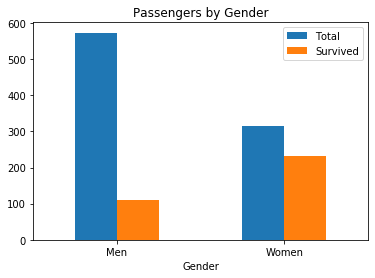

In [9]:
g.plot.bar(x = "Gender", y = ["Total", "Survived"], title = "Passengers by Gender", rot = 0)

## The majority of passengers were in 3rd class but most survivors were from 1st class

In [10]:
# finding the total number of passengers in each class
first = df[df["Class"] == 1]
tfc = len(first.index)

second = df[df["Class"] == 2]
tsc = len(second.index)

third = df[df["Class"] == 3]
ttc = len(third.index)

# finding the number of survived passengers by class
first = df[(df["Class"] == 1) & (df["Survived"] == 1)]
sfc = len(first.index)

second = df[(df["Class"] == 2) & (df["Survived"] == 1)]
ssc = len(second.index)

third = df[(df["Class"] == 3) & (df["Survived"] == 1)]
stc = len(third.index)

In [11]:
data = {"Class": ["First", "Second", "Third"], "Survived": [sfc, ssc, stc], "Total": [tfc, tsc, ttc]}
pc = pd.DataFrame(data)

# sorting the data by passenger count
pc_sorted = pc.sort_values(by = ["Survived"], ascending = 0)
pc_sorted

,Class,Survived,Total
0,First,136,216
2,Third,119,487
1,Second,87,184


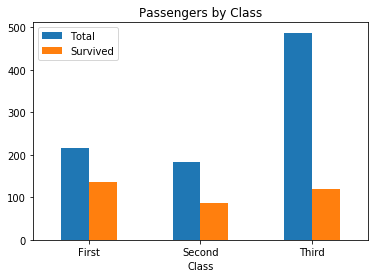

In [22]:
pc.plot.bar(x = "Class", y = ["Total", "Survived"], title = "Passengers by Class", rot = 0)

## So far we've seen that a woman in first-class had the highest chance of survival
### What age would she have been?

In [13]:
women = df[(df["Sex"] == "female") & (df["Class"] == 1) & (df["Survived"] == 1)]

In [29]:
age = women.describe()
age["Age"]

count    91.000000
mean     35.571429
std      12.870416
min      14.000000
25%      24.000000
50%      35.000000
75%      44.500000
max      63.000000
Name: Age, dtype: float64

## We can conclude that the average survivor was a 36 year old woman in first-class
#### ...such as Miss Young, Miss Crosby and Mrs Carter

In [28]:
avg_woman = df.loc[(df["Class"] == 1) & (df["Sex"] == "female") & (df["Age"] == 36)]
avg_woman

,Survived,Class,Name,Sex,Age,Fare
323,1,1,Miss. Marie Grice Young,female,36.0,135.6333
537,1,1,Miss. Harriet R Crosby,female,36.0,71.0000
759,1,1,Mrs. William Ernest (Lucile Polk) Carter,female,36.0,120.0000


## Conversely, a 2nd class 33 year old man was least likely to survive the tragedy

In [34]:
men = df[(df["Sex"] == "male") & (df["Class"] == 2) & (df["Survived"] == 0)]
age = men.describe()
age["Age"]

count    91.000000
mean     33.000000
std      12.019198
min      16.000000
25%      24.000000
50%      30.000000
75%      39.000000
max      70.000000
Name: Age, dtype: float64

#### ...such as Mr George Henry Hunt

In [33]:
avg_man = df.loc[(df["Class"] == 2) & (df["Sex"] == "male") & (df["Age"] == 33)]
avg_man

,Survived,Class,Name,Sex,Age,Fare
238,0,2,Mr. George Henry Hunt,male,33.0,12.275
